# 11. Actionable Insights
This notebook identifies and visualizes the top 10 high-value conversion targets.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# --- Setup Paths ---
SCRIPT_DIR = Path().resolve()
PROJECT_ROOT = SCRIPT_DIR.parent
INPUT_PATH = PROJECT_ROOT / "Data" / "Processed Datasets" / "station_behavior_segments.csv"
SAVE_PATH = PROJECT_ROOT / "Results" / "top_10_anchor_stations.png"

SUCCESS: Leaderboard saved to C:\Users\Siddharth\Desktop\DIVVY PROJECT\Results\top_10_anchor_stations.png


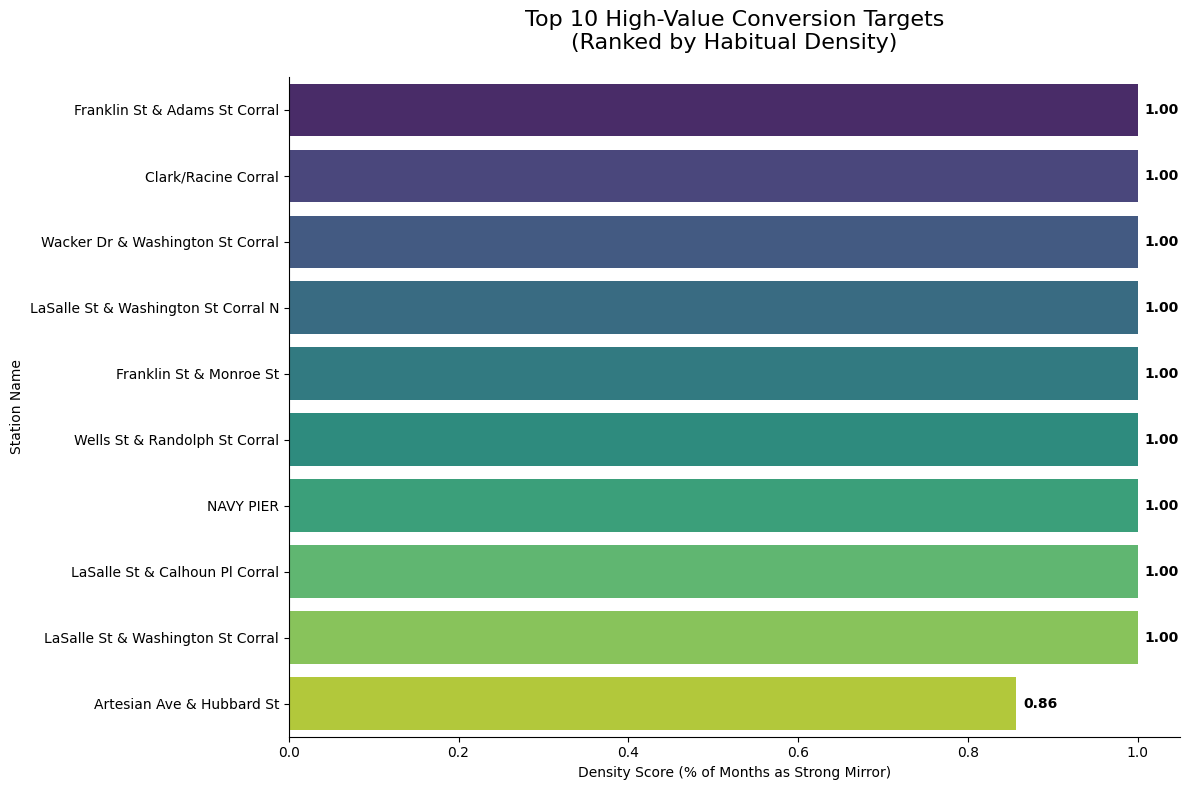

In [2]:
# --- Load and Rank ---
if INPUT_PATH.exists():
    df = pd.read_csv(INPUT_PATH)
    # Only pull the elite targets
    top_10 = (
        df[df['final_status'] == 'Confirmed Behavioral Anchor']
        .sort_values(by='density_score', ascending=False)
        .head(10)
    )

    # --- Horizontal Bar Chart (The Professional Choice) ---
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        data=top_10, 
        x='density_score', 
        y='start_station_name', 
        palette='viridis',
        hue='start_station_name',
        legend=False
    )

    # Add value labels for precision
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_width():.2f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='left', va='center', xytext=(5, 0), 
                    textcoords='offset points', fontweight='bold')

    plt.title("Top 10 High-Value Conversion Targets\n(Ranked by Habitual Density)", fontsize=16, pad=20)
    plt.xlabel("Density Score (% of Months as Strong Mirror)")
    plt.ylabel("Station Name")
    sns.despine()
    plt.tight_layout()

    SAVE_PATH.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(SAVE_PATH, dpi=300, bbox_inches="tight")
    print(f"SUCCESS: Leaderboard saved to {SAVE_PATH}")
else:
    print("Input file not found.")